# 3. Úvod do lineární algebry

In [1]:
# importování knihoven numpy, time a matplotlib
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# funkce pro výpočet matice pomocí Jacobiho iterační metody
def jacobiho_iteracni_metoda(A, b, niteraci):
    x = np.ones(len(A))
    D = np.diag(A)
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    for i in range(niteraci):
        x = (b - np.matmul((L + U), x)) / D
        #print("iterace:",i, "x=",x)
    return x

In [3]:
# funkce pro vygenerování matice
def vygeneruj_nahodnou_matici(rozmer):
    A = np.random.rand(rozmer, rozmer)
    np.fill_diagonal(A, np.sum(np.abs(A), axis=1))
    # zajištění že matice není singulární a správně konverguje
    while not np.linalg.matrix_rank(A) == rozmer:
        A = np.random.rand(rozmer, rozmer)
        np.fill_diagonal(A, np.sum(np.abs(A), axis=1))

    b = np.random.rand(rozmer)
    return [A, b]

In [10]:
# minimílní a maximální velikost matice
MIN_VELIKOST = 2
MAX_VELIKOST = 600

# počet interací iterační metody
N_ITERACI = 8

# počet iterací za velikost matice
POCET = 30

# seznam časů potřebných k nalezení řešení matice určité velikosti přímou a iterační metodou
prumerne_casy_prime_metody = []
prumerne_casy_iteracni_metody = []

velikosti = []

for velikost_matice in range(MIN_VELIKOST, MAX_VELIKOST, 50):
    velikosti.append(velikost_matice)
    
    casy_prime_metody = []
    casy_iteracni_metody = []
    
    for i in range(POCET):
        # vyenerování soustavy rovnic 
        A, b = vygeneruj_nahodnou_matici(velikost_matice)

        # řešení přímou metodou 
        start = time.perf_counter()
        np.linalg.solve(A, b)
        end = time.perf_counter()
        casy_prime_metody.append(end - start)

        # řešení iteracni metodou 
        start = time.perf_counter()
        jacobiho_iteracni_metoda(A, b, N_ITERACI)
        end = time.perf_counter()
        casy_iteracni_metody.append(end - start)
    
    prumerne_casy_prime_metody.append(sum(casy_prime_metody) / POCET)
    prumerne_casy_iteracni_metody.append(sum(casy_iteracni_metody) / POCET)

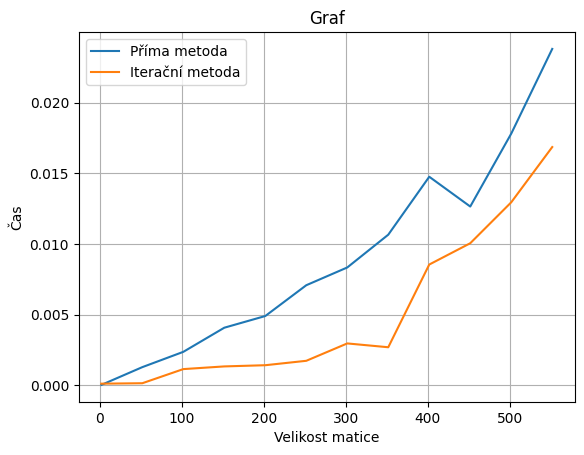

In [11]:
def vykresli_graf():
    plt.plot(velikosti, prumerne_casy_prime_metody, label="Příma metoda")
    plt.plot(velikosti, prumerne_casy_iteracni_metody, label="Iterační metoda")
    plt.xlabel('Velikost matice')
    plt.ylabel('Čas')
    plt.title("Graf")
    plt.legend()
    plt.grid()
    plt.show()

vykresli_graf()